In [ ]:
# Importing the required Libraries.

import numpy as np

# data processing
import pandas as pd


# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB


from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score,accuracy_score,f1_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
#metrics calculation
from sklearn import metrics


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split



In [ ]:
data = pd.read_csv('/content/web_page.csv')

In [ ]:
data.head()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase,Made_Purchase
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,...,1.0,9.0,3.0,Returning_Visitor,Not Specified,Deny,Not Specified,Other,0.0,False
1,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,...,2.0,2.0,4.0,Returning_Visitor,Female,Deny,Others,Married,0.0,False
2,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,...,3.0,1.0,4.0,Returning_Visitor,Female,ALL,Others,Married,1.0,False
3,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.4,...,4.0,3.0,3.0,Returning_Visitor,Male,ALL,Diploma,Single,0.0,False
4,1.0,0.0,0.0,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,...,2.0,1.0,5.0,Returning_Visitor,Male,Deny,Diploma,Other,1.0,False


In [ ]:
data.columns
data.shape

(14731, 22)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14731 entries, 0 to 14730
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         14578 non-null  float64
 1   HomePage_Duration                14581 non-null  float64
 2   LandingPage                      14578 non-null  float64
 3   LandingPage_Duration             14596 non-null  float64
 4   ProductDescriptionPage           14608 non-null  float64
 5   ProductDescriptionPage_Duration  14564 non-null  float64
 6   GoogleMetric:Bounce Rates        14580 non-null  float64
 7   GoogleMetric:Exit Rates          14602 non-null  float64
 8   GoogleMetric:Page Values         14599 non-null  float64
 9   SeasonalPurchase                 14581 non-null  float64
 10  Month_SeasonalPurchase           14587 non-null  object 
 11  OS                               14597 non-null  float64
 12  SearchEngine      

In [ ]:
# Loop through each column and print the percentage of null values
for column in data.columns:
    null_percentage = data[column].isnull().mean() * 100
    print(f"{column}: {null_percentage:.2f}% null values")

HomePage: 1.04% null values
HomePage_Duration: 1.02% null values
LandingPage: 1.04% null values
LandingPage_Duration: 0.92% null values
ProductDescriptionPage: 0.83% null values
ProductDescriptionPage_Duration: 1.13% null values
GoogleMetric:Bounce Rates: 1.03% null values
GoogleMetric:Exit Rates: 0.88% null values
GoogleMetric:Page Values: 0.90% null values
SeasonalPurchase: 1.02% null values
Month_SeasonalPurchase: 0.98% null values
OS: 0.91% null values
SearchEngine: 0.83% null values
Zone: 0.79% null values
Type of Traffic: 0.97% null values
CustomerType: 0.98% null values
Gender: 0.98% null values
Cookies Setting: 0.98% null values
Education: 0.92% null values
Marital Status: 0.88% null values
WeekendPurchase: 0.82% null values
Made_Purchase: 0.00% null values


In [ ]:
# To further determine if the missing values were missing completely at random or not to go with deleting.

mask = False
for col in data.columns:
    mask = mask | data[col].isnull()
dfnulls = data[mask]

dfnulls.head(30)

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase,Made_Purchase
8615,2.0,115.000000,2.0,NaN,23.0,404.619048,0.000000,0.026000,0.000000,0.0,...,1.0,2.0,2.0,Returning_Visitor,Female,Required,Others,Single,0.0,False
8616,0.0,0.000000,0.0,0.0,9.0,396.166667,0.000000,0.022222,0.000000,0.0,...,2.0,8.0,13.0,Other,NaN,ALL,Diploma,Single,0.0,False
8617,0.0,0.000000,0.0,0.0,14.0,183.666667,0.000000,NaN,0.000000,0.0,...,2.0,3.0,3.0,Returning_Visitor,Male,ALL,Others,Married,0.0,False
8618,0.0,0.000000,0.0,0.0,15.0,NaN,0.000000,0.026667,0.000000,0.0,...,5.0,6.0,3.0,Returning_Visitor,Female,Required,Graduate,Single,0.0,False
8619,0.0,0.000000,0.0,0.0,1.0,NaN,0.000000,0.100000,0.000000,0.8,...,2.0,3.0,3.0,Returning_Visitor,Not Specified,ALL,Others,Single,0.0,False
8620,11.0,385.566667,0.0,0.0,54.0,1256.293333,0.010345,NaN,0.000000,0.0,...,2.0,7.0,3.0,Returning_Visitor,Female,Required,Graduate,Other,0.0,False
8621,5.0,76.000000,0.0,0.0,20.0,535.250000,0.000000,0.015789,0.000000,0.0,...,1.0,1.0,3.0,Returning_Visitor,Male,Required,Not Specified,Other,1.0,False
8622,0.0,0.000000,0.0,0.0,8.0,704.166667,0.012500,0.035417,0.000000,0.0,...,2.0,NaN,3.0,Returning_Visitor,Male,Required,Graduate,Single,0.0,False
8623,0.0,0.000000,0.0,0.0,9.0,591.250000,0.000000,0.022222,0.000000,0.0,...,2.0,6.0,13.0,Returning_Visitor,Not Specified,Required,Others,Single,0.0,False
8624,0.0,0.000000,0.0,0.0,6.0,351.400000,0.066667,0.100000,NaN,0.0,...,2.0,1.0,3.0,Returning_Visitor,Female,ALL,Others,Other,0.0,False


In [ ]:
# To see the effect of dropping all missing values on the size of the retained dataset.

df_drop = data.dropna()

df_drop.shape

# Almost 20% of the data would be lost by dropping missing values. Therefore, imputation is preferred to dropping Null Values.

(11808, 22)

In [ ]:
data.describe()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,OS,SearchEngine,Zone,Type of Traffic,WeekendPurchase
count,14578.000000,14581.000000,14578.000000,14596.000000,14608.000000,14564.000000,14580.000000,14602.000000,14599.000000,14581.000000,14597.000000,14609.000000,14614.000000,14588.000000,14610.000000
mean,2.250240,79.300762,0.490739,33.455943,31.559488,1184.346084,0.023366,0.044664,4.812620,0.064083,2.122422,2.356629,3.155673,4.090143,0.234155
std,3.288042,179.374699,1.252376,140.146256,44.897089,2009.496307,0.050011,0.049912,16.887366,0.202583,0.914404,1.721823,2.405155,4.040147,0.423484
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,173.187500,0.000000,0.014502,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000
50%,1.000000,5.000000,0.000000,0.000000,17.500000,584.333333,0.003478,0.026406,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000
75%,3.000000,91.000000,0.000000,0.000000,38.000000,1434.255128,0.018182,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000


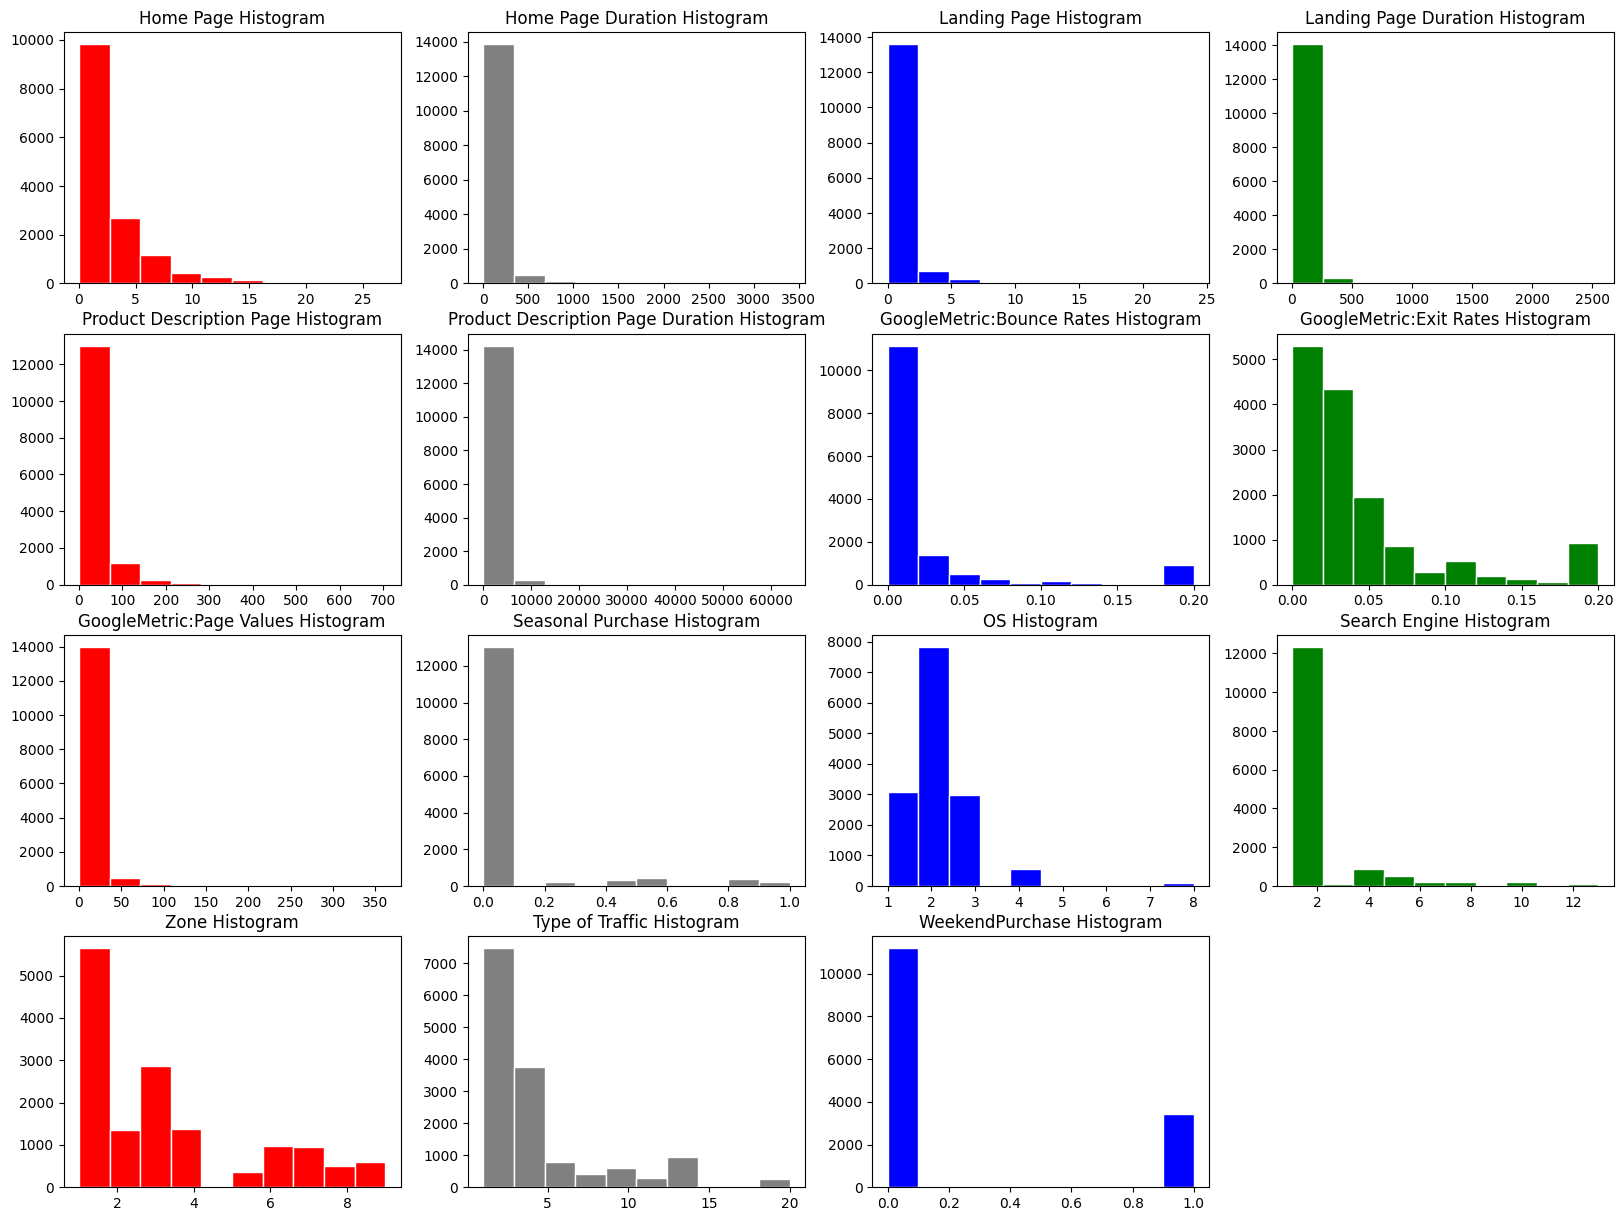

In [ ]:
# To determine the distribution of the numerical data before imputation.

plt.figure(figsize=(20,15))

plt.subplot(4,4,1)
plt.hist(data['HomePage'], color = 'red', edgecolor = 'white')
plt.title('Home Page Histogram')

plt.subplot(4,4,2)
plt.hist(data['HomePage_Duration'], color = 'grey', edgecolor = 'white')
plt.title('Home Page Duration Histogram')

plt.subplot(4,4,3)
plt.hist(data['LandingPage'], color = 'blue', edgecolor = 'white')
plt.title('Landing Page Histogram')

plt.subplot(4,4,4)
plt.hist(data['LandingPage_Duration'], color = 'green', edgecolor = 'white')
plt.title('Landing Page Duration Histogram')

plt.subplot(4,4,5)
plt.hist(data['ProductDescriptionPage'], color = 'red', edgecolor = 'white')
plt.title('Product Description Page Histogram')

plt.subplot(4,4,6)
plt.hist(data['ProductDescriptionPage_Duration'], color = 'grey', edgecolor = 'white')
plt.title('Product Description Page Duration Histogram')

plt.subplot(4,4,7)
plt.hist(data['GoogleMetric:Bounce Rates'], color = 'blue', edgecolor = 'white')
plt.title('GoogleMetric:Bounce Rates Histogram')

plt.subplot(4,4,8)
plt.hist(data['GoogleMetric:Exit Rates'], color = 'green', edgecolor = 'white')
plt.title('GoogleMetric:Exit Rates Histogram')

plt.subplot(4,4,9)
plt.hist(data['GoogleMetric:Page Values'], color = 'red', edgecolor = 'white')
plt.title('GoogleMetric:Page Values Histogram')

plt.subplot(4,4,10)
plt.hist(data['SeasonalPurchase'], color = 'grey', edgecolor = 'white')
plt.title('Seasonal Purchase Histogram')

plt.subplot(4,4,11)
plt.hist(data['OS'], color = 'blue', edgecolor = 'white')
plt.title('OS Histogram')

plt.subplot(4,4,12)
plt.hist(data['SearchEngine'], color = 'green', edgecolor = 'white')
plt.title('Search Engine Histogram')

plt.subplot(4,4,13)
plt.hist(data['Zone'], color = 'red', edgecolor = 'white')
plt.title('Zone Histogram')

plt.subplot(4,4,14)
plt.hist(data['Type of Traffic'], color = 'grey', edgecolor = 'white')
plt.title('Type of Traffic Histogram')

plt.subplot(4,4,15)
plt.hist(data['WeekendPurchase'], color = 'blue', edgecolor = 'white')
plt.title('WeekendPurchase Histogram')

plt.show()

In [ ]:
# Now for the Object class variables to determine their distribution.
import plotly.express as px

data['Month_SeasonalPurchase'].value_counts()

#data['Month_SeasonalPurchase'].head(50)

#Forward or Backward Fill

month_counts = data['Month_SeasonalPurchase'].value_counts().reset_index()
month_counts.columns = ['Month', 'Count']

fig = px.bar(month_counts, x='Month', y='Count', title='Month Seasonal Purchase Counts', color = 'Month')


fig.show()

In [ ]:
data['CustomerType'].value_counts()

#data['CustomerType'].head(50)

#Forward or Backward Fill

cust_counts = data['CustomerType'].value_counts().reset_index()
cust_counts.columns = ['Type', 'Count']

fig = px.bar(cust_counts, x='Type', y='Count', title='Customer Type Counts', color = 'Type')


fig.show()

In [ ]:
from os import getrandom
data['Gender'].value_counts()

#data['Gender'].head(50)

#Forward or Backward Fill

gend_counts = data['Gender'].value_counts().reset_index()
gend_counts.columns = ['Gender', 'Count']

fig = px.bar(gend_counts, x='Gender', y='Count', title='Gender Type Counts', color = 'Gender')


fig.show()

In [ ]:
data['Cookies Setting'].value_counts()

#data['Cookies Setting'].head(50)

#Forward or Backward Fill

cook_counts = data['Cookies Setting'].value_counts().reset_index()
cook_counts.columns = ['Cookies_Setting', 'Count']

fig = px.bar(cook_counts, x='Cookies_Setting', y='Count', title='Cookies Setting Type Counts', color = 'Cookies_Setting')


fig.show()

In [ ]:
data['Education'].value_counts()

#data['Education'].head(50)

#Forward or Backward Fill

edu_counts = data['Education'].value_counts().reset_index()
edu_counts.columns = ['Education', 'Count']

fig = px.bar(edu_counts, x='Education', y='Count', title='Education Type Counts', color = 'Education')


fig.show()

In [ ]:
data['Marital Status'].value_counts()

#data['Marital Status'].head(50)

#Forward or Backward Fill

status_counts = data['Marital Status'].value_counts().reset_index()
status_counts.columns = ['Status', 'Count']

fig = px.bar(status_counts, x='Status', y='Count', title='Marital Status Type Counts', color = 'Status')


fig.show()

In [ ]:
# To Fill the Numerical Data with the median and mode where necessary following the analysis of the distributions.

# For Medians and Modes
fill_values = {
    'HomePage': data['HomePage'].median(),
    'HomePage_Duration': data['HomePage_Duration'].median(),
    'LandingPage': data['LandingPage'].median(),
    'LandingPage_Duration': data['LandingPage_Duration'].median(),
    'ProductDescriptionPage': data['ProductDescriptionPage'].median(),
    'ProductDescriptionPage_Duration': data['ProductDescriptionPage_Duration'].median(),
    'GoogleMetric:Bounce Rates': data['GoogleMetric:Bounce Rates'].median(),
    'GoogleMetric:Exit Rates': data['GoogleMetric:Exit Rates'].median(),
    'GoogleMetric:Page Values': data['GoogleMetric:Page Values'].median(),
    'SeasonalPurchase': data['SeasonalPurchase'].mode()[0] if not data['SeasonalPurchase'].mode().empty else "Fallback Value",
    'OS': data['OS'].mode()[0] if not data['OS'].mode().empty else "Fallback Value",
    'SearchEngine': data['SearchEngine'].mode()[0] if not data['SearchEngine'].mode().empty else "Fallback Value",
    'Zone': data['Zone'].mode()[0] if not data['Zone'].mode().empty else "Fallback Value",
    'Type of Traffic': data['Type of Traffic'].mode()[0] if not data['Type of Traffic'].mode().empty else "Fallback Value",
    'WeekendPurchase': data['WeekendPurchase'].mode()[0] if not data['WeekendPurchase'].mode().empty else "Fallback Value"
}

# Fill missing values in each specified column with its median and mode as described.
data = data.fillna(fill_values)

In [ ]:
# To see the shape of the data set when dropping the remaining Object null values.

data = data.dropna()

data.shape

#Less than 10% of the data was dropped.

(13888, 22)

In [ ]:
# There will be no need to fill the Object classes as it would distort the integrity of the data.

#columns_to_ffill = [
    #'Month_SeasonalPurchase', 'CustomerType', 'Gender',
    #'Cookies Setting', 'Education', 'Marital Status']

# Perform the forward fill for the specified columns
#data[columns_to_ffill] = data[columns_to_ffill].ffill()

In [ ]:
# Loop through each column again and print the percentage of null values
for column in data.columns:
    null_percentage = data[column].isnull().mean() * 100
    print(f"{column}: {null_percentage:.2f}% null values")

HomePage: 0.00% null values
HomePage_Duration: 0.00% null values
LandingPage: 0.00% null values
LandingPage_Duration: 0.00% null values
ProductDescriptionPage: 0.00% null values
ProductDescriptionPage_Duration: 0.00% null values
GoogleMetric:Bounce Rates: 0.00% null values
GoogleMetric:Exit Rates: 0.00% null values
GoogleMetric:Page Values: 0.00% null values
SeasonalPurchase: 0.00% null values
Month_SeasonalPurchase: 0.00% null values
OS: 0.00% null values
SearchEngine: 0.00% null values
Zone: 0.00% null values
Type of Traffic: 0.00% null values
CustomerType: 0.00% null values
Gender: 0.00% null values
Cookies Setting: 0.00% null values
Education: 0.00% null values
Marital Status: 0.00% null values
WeekendPurchase: 0.00% null values
Made_Purchase: 0.00% null values


In [ ]:
labelencoder = LabelEncoder()

data['Made_Purchase'] = labelencoder.fit_transform(data['Made_Purchase'])

data.head()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase,Made_Purchase
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,...,1.0,9.0,3.0,Returning_Visitor,Not Specified,Deny,Not Specified,Other,0.0,0
1,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,...,2.0,2.0,4.0,Returning_Visitor,Female,Deny,Others,Married,0.0,0
2,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,...,3.0,1.0,4.0,Returning_Visitor,Female,ALL,Others,Married,1.0,0
3,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.4,...,4.0,3.0,3.0,Returning_Visitor,Male,ALL,Diploma,Single,0.0,0
4,1.0,0.0,0.0,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,...,2.0,1.0,5.0,Returning_Visitor,Male,Deny,Diploma,Other,1.0,0


<ipython-input-301-4550f350f3dc>:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Text(0.5, 1.0, 'Correlation between continuos variable [Heat Map]')

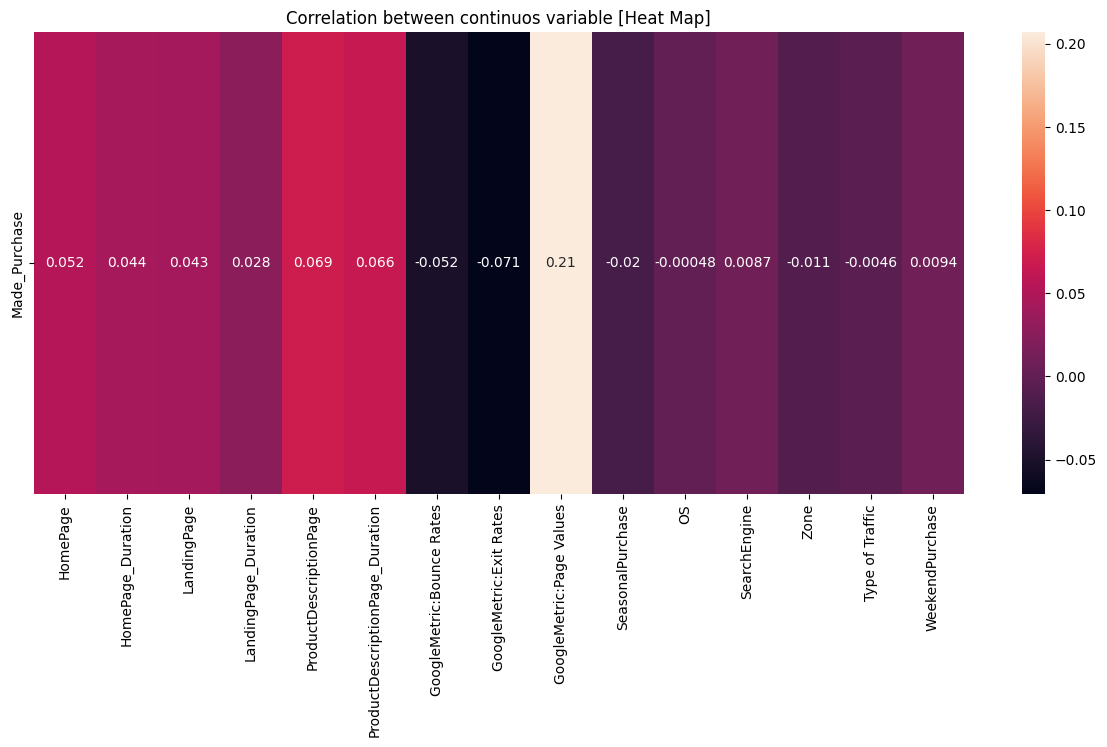

In [ ]:
# To Analyse the Numerical Variables to see which ones have an impact on the Target Variable.

# Compute the full correlation matrix
corr_matrix = data.corr()

# Define the two specific columns and the other columns of interest
specific_columns = ['Made_Purchase']
other_columns = [col for col in corr_matrix.columns if col not in specific_columns]

# Filter the correlation matrix
filtered_corr = corr_matrix.loc[specific_columns, other_columns]

# Plot the heatmap
plt.figure(figsize=(15, 6))
g = sns.heatmap(filtered_corr, annot=True)

g.set_title('Correlation between continuos variable [Heat Map]')

In [ ]:
# To then drop the columns with the least impact on the Target Variable : OS, SearchEngine, Type of Traffic and WeekendPurchase.

# Columns to drop
columns_to_drop = ['OS', 'SearchEngine', 'Type of Traffic', 'WeekendPurchase']

# Drop the specified columns from the DataFrame
data = data.drop(columns=columns_to_drop, axis=1)

data.shape

(13888, 18)

In [ ]:
#converting remaining string data into numerical

columns_to_encode = [
    'Month_SeasonalPurchase', 'CustomerType', 'Gender',
    'Cookies Setting', 'Education', 'Marital Status'
]

labelencoder = LabelEncoder()

for column in columns_to_encode:
    data[column] = labelencoder.fit_transform(data[column])

data.head()


,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,Month_SeasonalPurchase,Zone,CustomerType,Gender,Cookies Setting,Education,Marital Status,Made_Purchase
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,2,9.0,2,2,1,2,1,0
1,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,2,2.0,2,0,1,3,0,0
2,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,2,1.0,2,0,0,3,0,0
3,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.4,2,3.0,2,1,0,0,2,0
4,1.0,0.0,0.0,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,2,1.0,2,1,1,0,1,0


In [ ]:
data.Made_Purchase.unique()

array([0, 1])

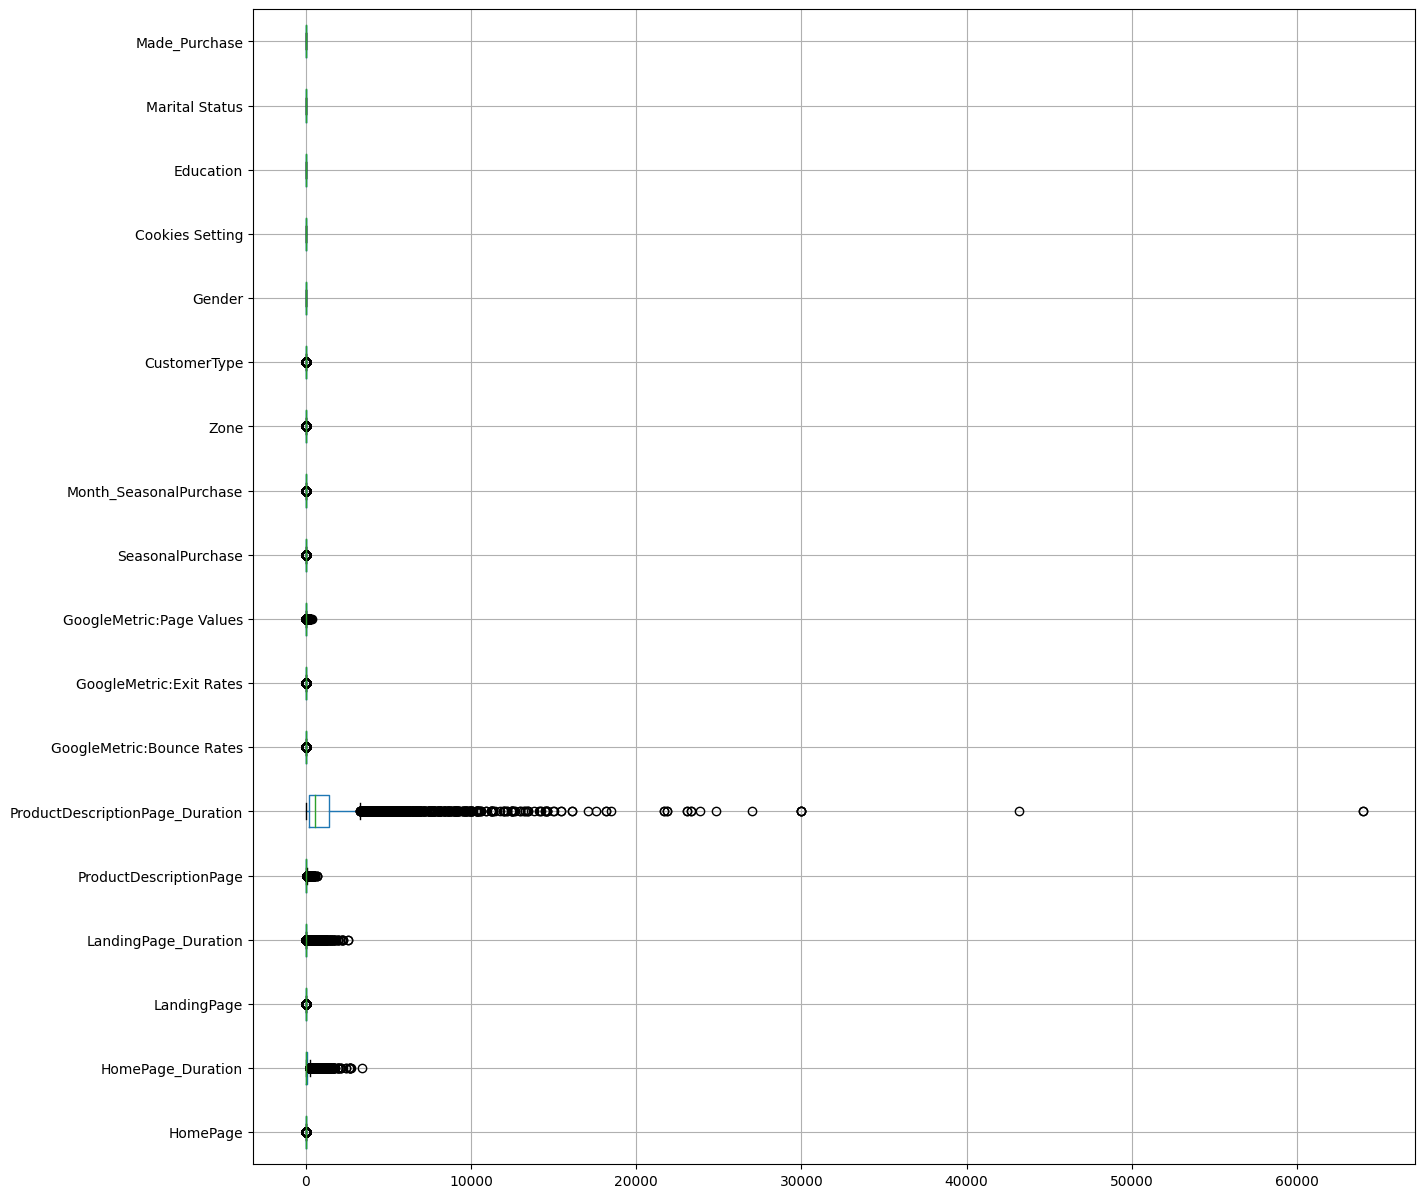

In [ ]:
# To view the box plot of the data for outlier detection.

plt.figure(figsize = (15,15))
data.boxplot(vert=False)
plt.show()

# Outliers mostly in Duration data.

In [ ]:
# To compute the IQR fo the entire dataset.

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

HomePage                              3.000000
HomePage_Duration                    90.025000
LandingPage                           0.000000
LandingPage_Duration                  0.000000
ProductDescriptionPage               30.000000
ProductDescriptionPage_Duration    1248.398333
GoogleMetric:Bounce Rates             0.017647
GoogleMetric:Exit Rates               0.035417
GoogleMetric:Page Values              0.000000
SeasonalPurchase                      0.000000
Month_SeasonalPurchase                2.000000
Zone                                  3.000000
CustomerType                          0.000000
Gender                                2.000000
Cookies Setting                       2.000000
Education                             3.000000
Marital Status                        2.000000
Made_Purchase                         1.000000
dtype: float64


In [ ]:
# To remove outliers using only two identified columns with Large IQR in Duration Data.

columns_to_process = ['HomePage_Duration', 'ProductDescriptionPage_Duration']


for column in columns_to_process:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1


    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

In [ ]:
data.shape

(11576, 18)

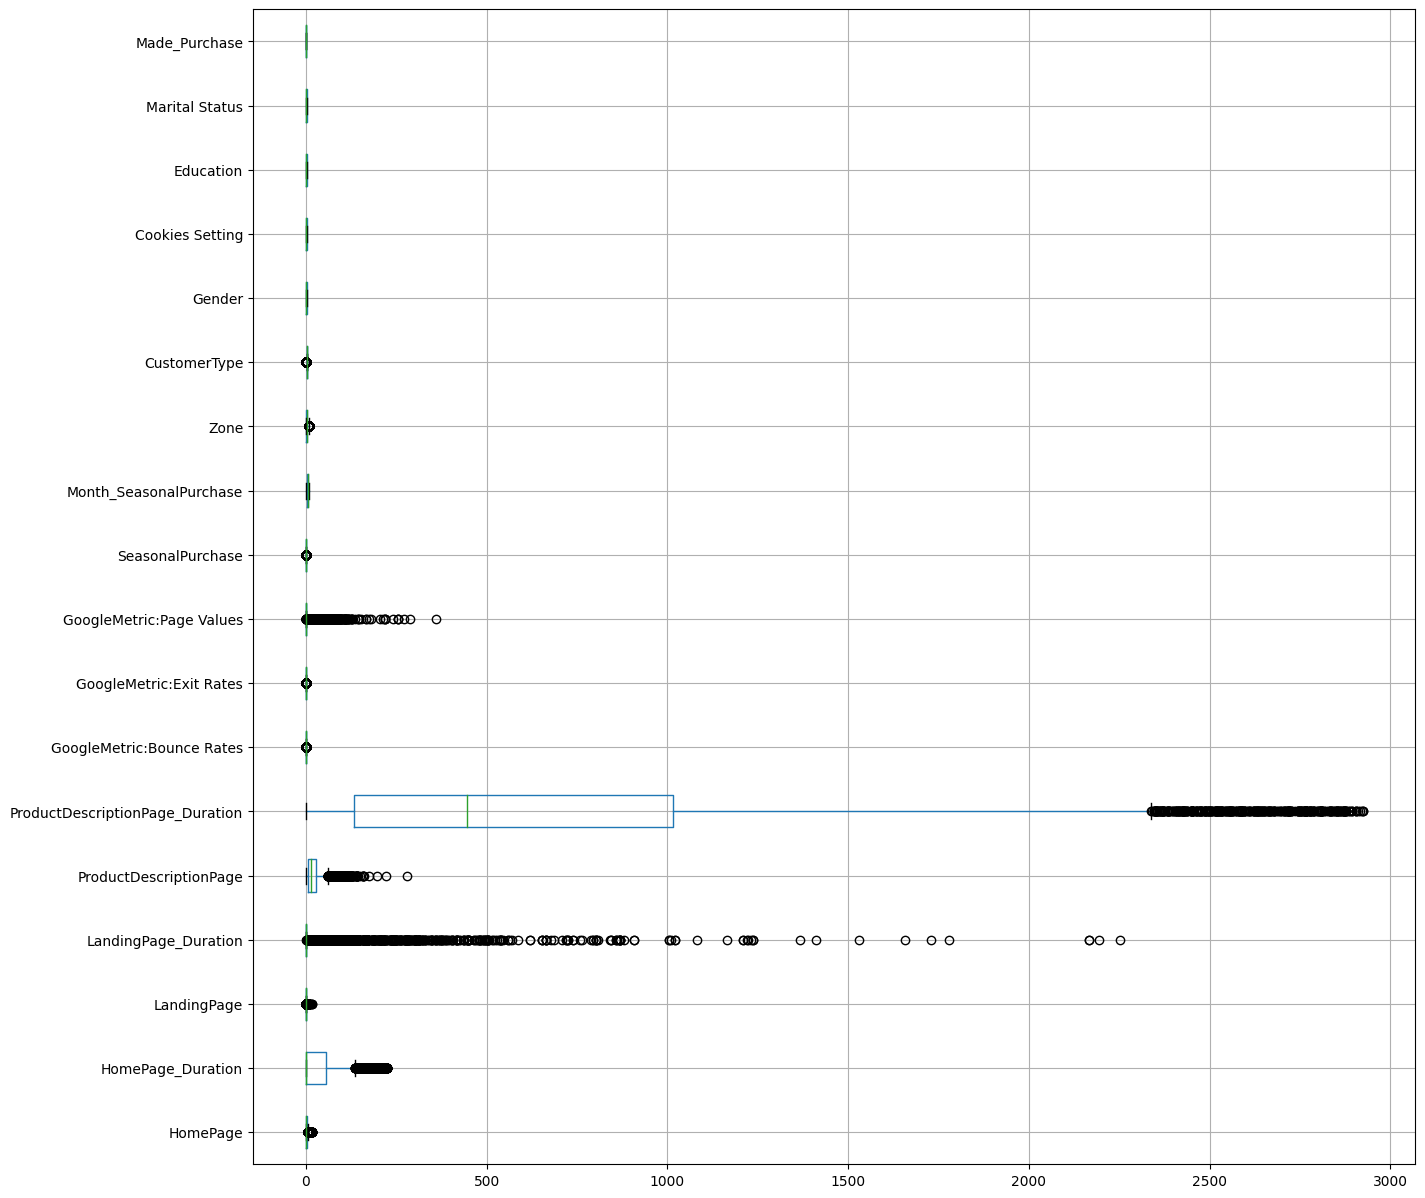

In [ ]:
plt.figure(figsize = (15,15))
data.boxplot(vert=False)
plt.show()

In [ ]:
# Again to view the IQR after the first Outlier removal.

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

HomePage                             2.000000
HomePage_Duration                   54.500000
LandingPage                          0.000000
LandingPage_Duration                 0.000000
ProductDescriptionPage              22.000000
ProductDescriptionPage_Duration    882.200000
GoogleMetric:Bounce Rates            0.021053
GoogleMetric:Exit Rates              0.041080
GoogleMetric:Page Values             0.000000
SeasonalPurchase                     0.000000
Month_SeasonalPurchase               3.000000
Zone                                 3.000000
CustomerType                         0.000000
Gender                               2.000000
Cookies Setting                      2.000000
Education                            3.000000
Marital Status                       2.000000
Made_Purchase                        1.000000
dtype: float64


In [ ]:
# To remove outliers again using only two identified columns with Large IQR in Duration Data.

columns_to_process = ['HomePage_Duration', 'ProductDescriptionPage_Duration']


for column in columns_to_process:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1


    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

data.shape

(10157, 18)

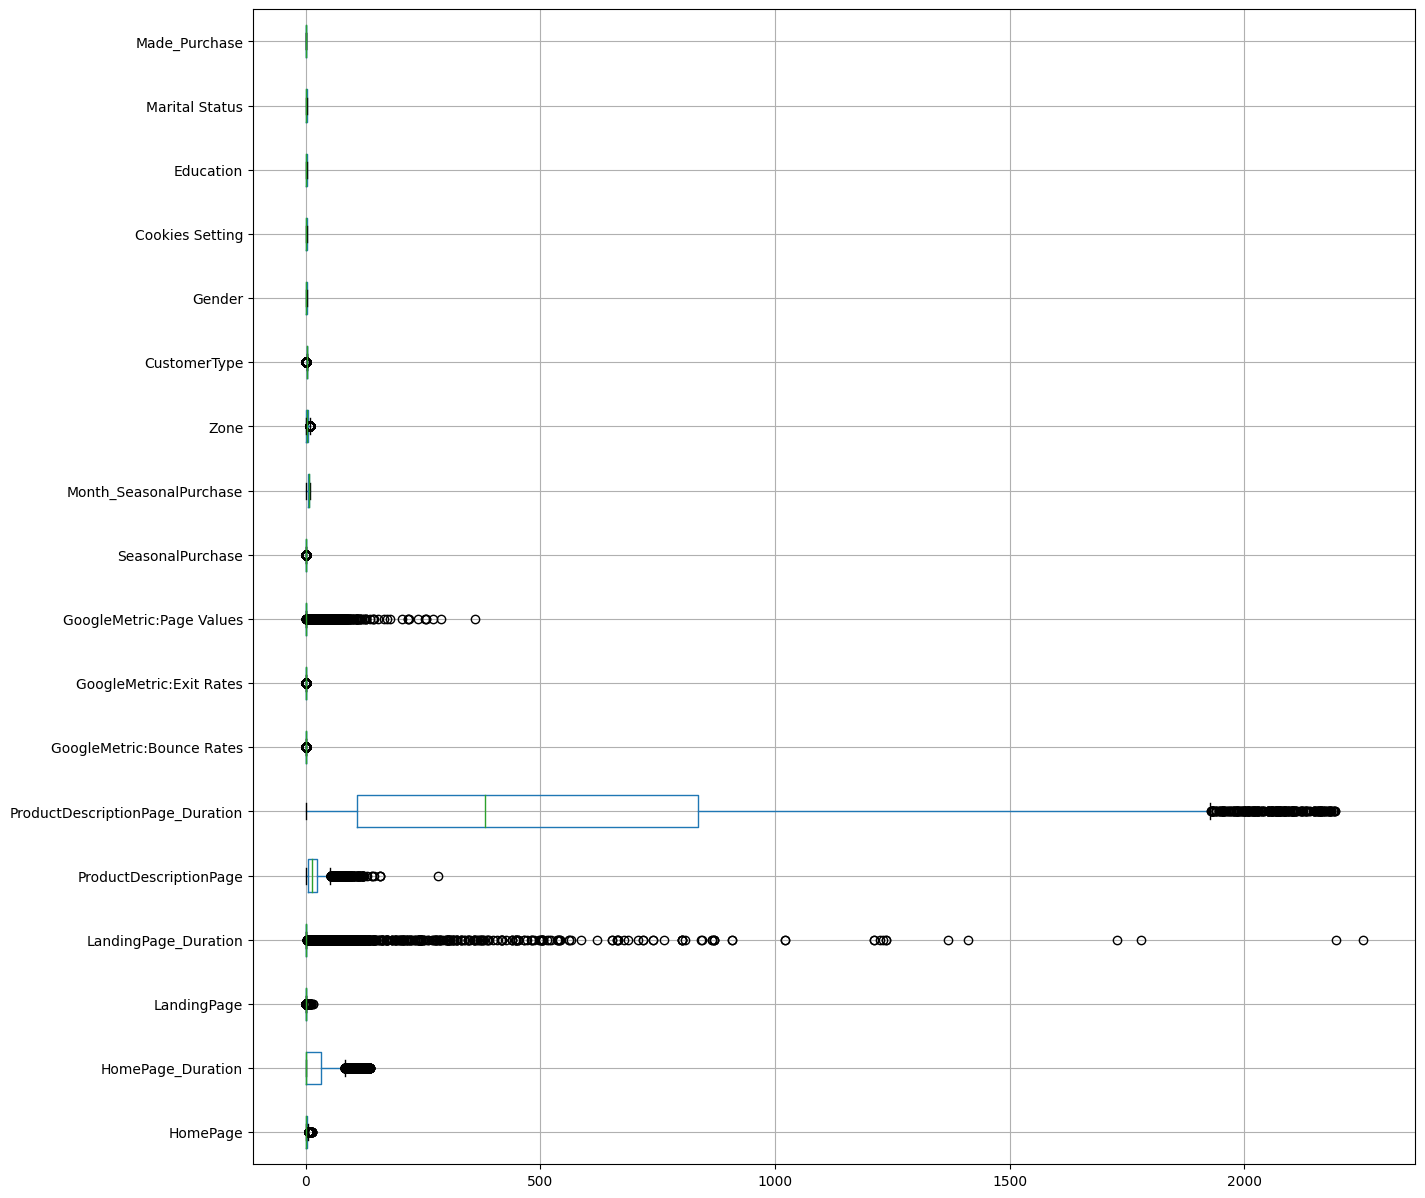

In [ ]:
# To view the boxplot again after the final removal.

plt.figure(figsize = (15,15))
data.boxplot(vert=False)
plt.show()

In [ ]:
# To remove outliers in the two columns with 0 IQR and more outliers : Landing Page Duration and Google Metrics Page Values.


percentile_99 = np.percentile(data['LandingPage_Duration'], 99)

# Keep only the rows where 'YourColumn' values are less than or equal to the 99th percentile
data = data[data['LandingPage_Duration'] <= percentile_99]

percentile_99 = np.percentile(data['GoogleMetric:Page Values'], 99)

# Keep only the rows where 'YourColumn' values are less than or equal to the 99th percentile
data = data[data['GoogleMetric:Page Values'] <= percentile_99]


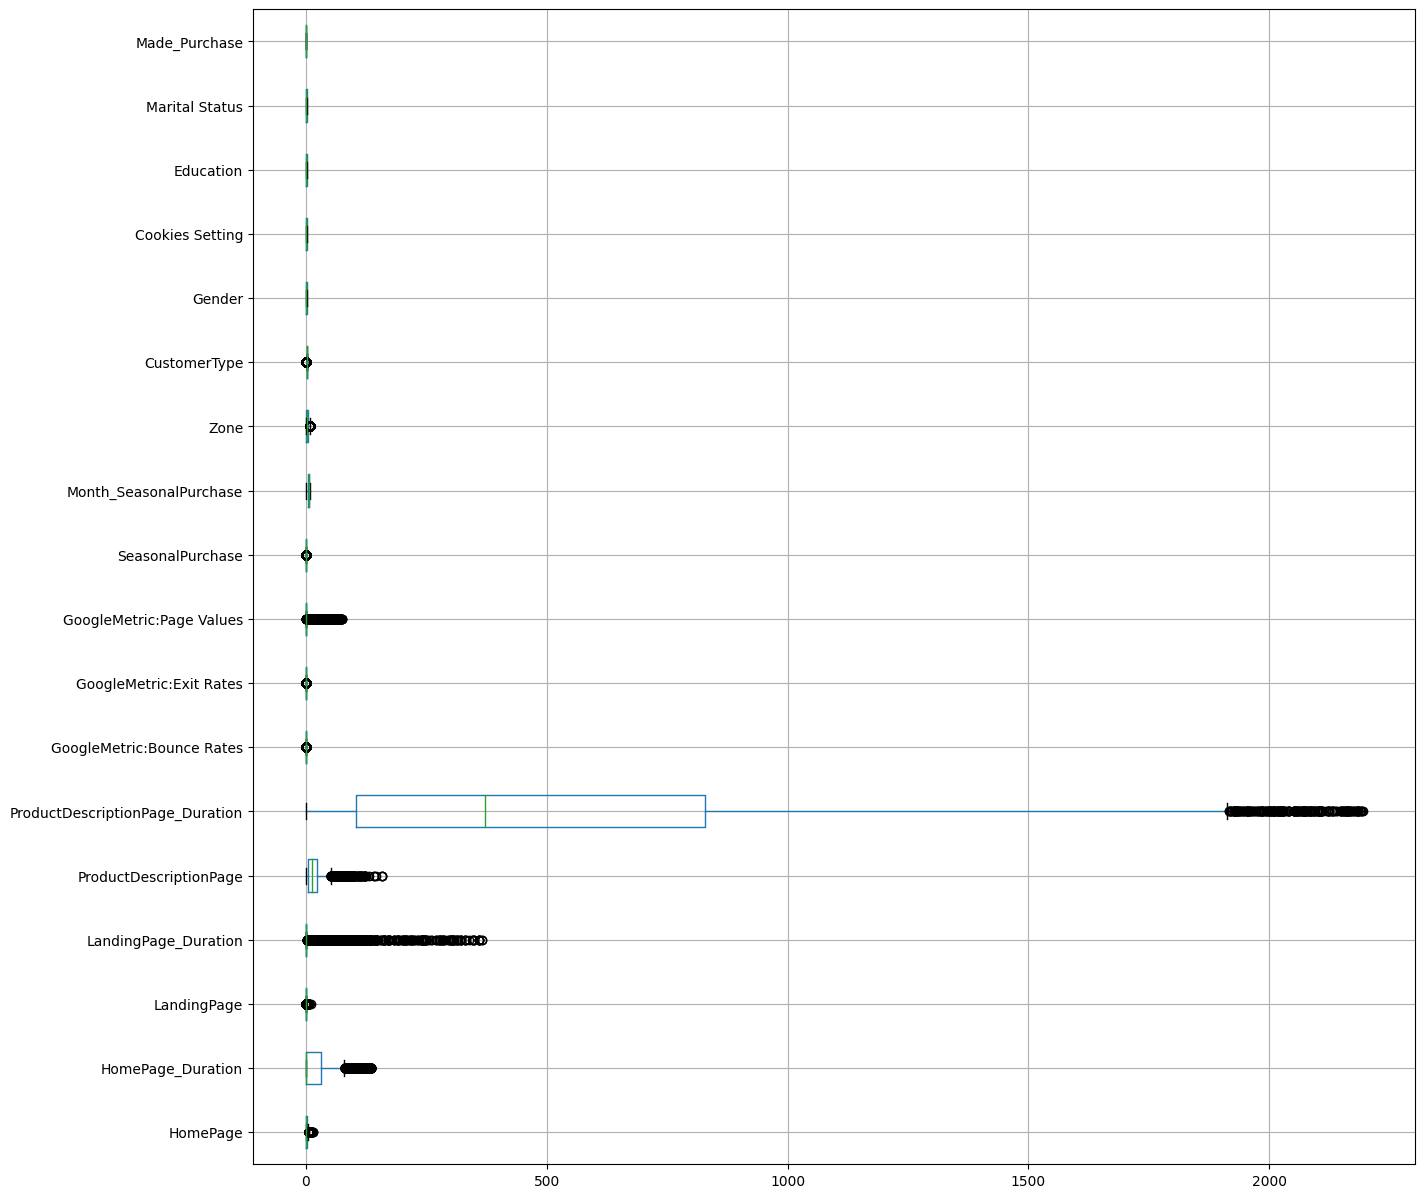

In [ ]:
# To view the boxplot again after the final removal.

plt.figure(figsize = (15,15))
data.boxplot(vert=False)
plt.show()

In [ ]:
data.shape


(9954, 18)

In [ ]:
# To perform standardisation on the numerical data.

# Specify the columns to scale
columns_to_scale = ['HomePage_Duration', 'LandingPage_Duration', 'ProductDescriptionPage_Duration']

scaler = RobustScaler()

data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

In [ ]:
# To perform standardisation on the numerical data.

# Specify the columns to scale
columns_to_scale = ['HomePage', 'LandingPage', 'ProductDescriptionPage', 'GoogleMetric:Bounce Rates', 'GoogleMetric:Exit Rates','GoogleMetric:Page Values', 'Month_SeasonalPurchase', 'Zone']

scaler = MinMaxScaler()

data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
HomePage,9954.0,0.078561,0.131327,0.000000,0.000000,0.000000,0.142857,1.000000
HomePage_Duration,9954.0,0.651224,1.098966,0.000000,0.000000,0.000000,1.000000,4.253125
LandingPage,9954.0,0.021820,0.071975,0.000000,0.000000,0.000000,0.000000,1.000000
LandingPage_Duration,9954.0,7.834320,35.010566,0.000000,0.000000,0.000000,0.000000,365.966667
ProductDescriptionPage,9954.0,0.110443,0.110757,0.000000,0.031447,0.075472,0.150943,1.000000
ProductDescriptionPage_Duration,9954.0,0.239984,0.747750,-0.512833,-0.368152,0.000000,0.631848,2.519298
GoogleMetric:Bounce Rates,9954.0,0.146426,0.284279,0.000000,0.000000,0.017391,0.125000,1.000000
GoogleMetric:Exit Rates,9954.0,0.266438,0.276019,0.000000,0.084750,0.166667,0.333333,1.000000
GoogleMetric:Page Values,9954.0,0.037330,0.132085,0.000000,0.000000,0.000000,0.000000,1.000000
SeasonalPurchase,9954.0,0.072132,0.213380,0.000000,0.000000,0.000000,0.000000,1.000000


In [ ]:
# To drop more columns with 0 IQR that may impact the ML model.

columns_to_drop = [ 'LandingPage_Duration']

# Drop the specified columns from the DataFrame
data = data.drop(columns=columns_to_drop, axis=1)

data.shape

(9954, 17)

In [ ]:
#Final Data Set to be used in the ML prediction.

data.describe().T

,count,mean,std,min,25%,50%,75%,max
HomePage,9954.0,0.078561,0.131327,0.000000,0.000000,0.000000,0.142857,1.000000
HomePage_Duration,9954.0,0.651224,1.098966,0.000000,0.000000,0.000000,1.000000,4.253125
LandingPage,9954.0,0.021820,0.071975,0.000000,0.000000,0.000000,0.000000,1.000000
ProductDescriptionPage,9954.0,0.110443,0.110757,0.000000,0.031447,0.075472,0.150943,1.000000
ProductDescriptionPage_Duration,9954.0,0.239984,0.747750,-0.512833,-0.368152,0.000000,0.631848,2.519298
GoogleMetric:Bounce Rates,9954.0,0.146426,0.284279,0.000000,0.000000,0.017391,0.125000,1.000000
GoogleMetric:Exit Rates,9954.0,0.266438,0.276019,0.000000,0.084750,0.166667,0.333333,1.000000
GoogleMetric:Page Values,9954.0,0.037330,0.132085,0.000000,0.000000,0.000000,0.000000,1.000000
SeasonalPurchase,9954.0,0.072132,0.213380,0.000000,0.000000,0.000000,0.000000,1.000000
Month_SeasonalPurchase,9954.0,0.564229,0.255888,0.000000,0.444444,0.666667,0.777778,1.000000


In [ ]:
# Bificate the data and split the test and train data.
# Specify the target variable
target = 'Made_Purchase'

# Split the dataset into features (X) and target (y)
X = data.drop(target, axis=1)
y = data[target]

# Split the data into training and test sets with shuffling

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=0)
random_forest.fit(X_train, y_train)
#predicting on train data to get train accuracy
Y_prediction = random_forest.predict(X_train)
#calcuate accuracy
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print(acc_random_forest)

84.5


In [ ]:
predictions = random_forest.predict(X_train)
confusion_matrix(y_train, predictions)

array([[4435,  321],
       [ 836, 1873]])

In [ ]:
print(metrics.classification_report(y_train, predictions, digits=3))

              precision    recall  f1-score   support

           0      0.841     0.933     0.885      4756
           1      0.854     0.691     0.764      2709

    accuracy                          0.845      7465
   macro avg      0.848     0.812     0.824      7465
weighted avg      0.846     0.845     0.841      7465



In [ ]:
#random_forest = RandomForestClassifier(n_estimators=100, random_state=0)
#random_forest.fit(principalComponents_test, y_test)
Y_prediction = random_forest.predict(X_test)
random_forest.score(X_test, y_test)
acc_random_forest_test = round(random_forest.score(X_test, y_test) * 100, 2)
print(acc_random_forest_test)

53.23


In [ ]:
predictions = random_forest.predict(X_test)
confusion_matrix(y_test, predictions)

array([[1128,  467],
       [ 697,  197]])

In [ ]:
print(metrics.classification_report(y_test, predictions, digits=3))

              precision    recall  f1-score   support

           0      0.618     0.707     0.660      1595
           1      0.297     0.220     0.253       894

    accuracy                          0.532      2489
   macro avg      0.457     0.464     0.456      2489
weighted avg      0.503     0.532     0.514      2489



In [ ]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_prediction = gaussian.predict(X_train)
gaussian.score(X_train, y_train)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
print(acc_gaussian)

66.32


In [ ]:
predictions = gaussian.predict(X_train)
confusion_matrix(y_train, predictions)

array([[4336,  420],
       [2094,  615]])

In [ ]:
print(metrics.classification_report(y_train, predictions, digits=3))

              precision    recall  f1-score   support

           0      0.674     0.912     0.775      4756
           1      0.594     0.227     0.329      2709

    accuracy                          0.663      7465
   macro avg      0.634     0.569     0.552      7465
weighted avg      0.645     0.663     0.613      7465



In [ ]:
#gaussian = GaussianNB()
#gaussian.fit(principalComponents_test, y_test)
Y_prediction = gaussian.predict(X_test)
gaussian.score(X_test, y_test)
acc_gaussian_test = round(gaussian.score(X_test, y_test) * 100, 2)
print(acc_gaussian_test)

66.77


In [ ]:
predictions = gaussian.predict(X_test)
confusion_matrix(y_test, predictions)

array([[1447,  148],
       [ 679,  215]])

In [ ]:
print(metrics.classification_report(y_test, predictions, digits=3))

              precision    recall  f1-score   support

           0      0.681     0.907     0.778      1595
           1      0.592     0.240     0.342       894

    accuracy                          0.668      2489
   macro avg      0.636     0.574     0.560      2489
weighted avg      0.649     0.668     0.621      2489



In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_train)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
print(acc_log)

67.11


In [ ]:
predictions = logreg.predict(X_train)
confusion_matrix(y_train, predictions)

array([[4611,  145],
       [2310,  399]])

In [ ]:
print(metrics.classification_report(y_train, predictions, digits=3))

              precision    recall  f1-score   support

           0      0.666     0.970     0.790      4756
           1      0.733     0.147     0.245      2709

    accuracy                          0.671      7465
   macro avg      0.700     0.558     0.518      7465
weighted avg      0.691     0.671     0.592      7465



In [ ]:
#logreg = LogisticRegression()
#logreg.fit(principalComponents_test, y_test)
Y_pred = logreg.predict(X_test)
acc_log_test = round(logreg.score(X_test, y_test) * 100, 2)
print(acc_log_test)

68.46


In [ ]:
predictions = logreg.predict(X_test)
confusion_matrix(y_test, predictions)

array([[1551,   44],
       [ 741,  153]])

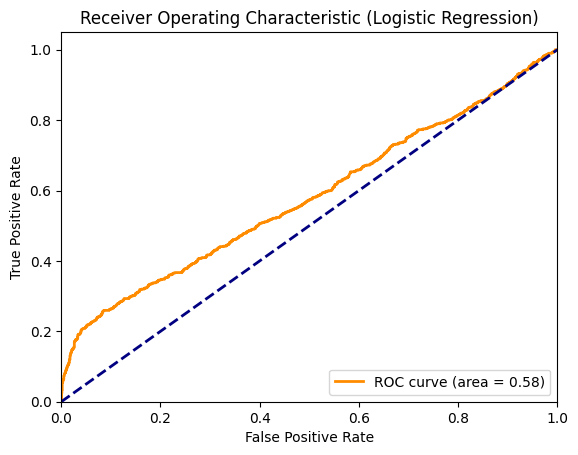

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities for the test data
y_scores = model.predict_proba(X_test)[:, 1]

# Compute ROC metrics
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Logistic Regression)')
plt.legend(loc="lower right")
plt.show()

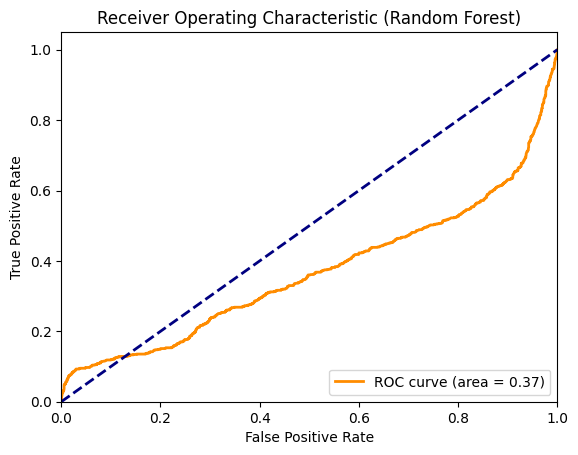

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Predict probabilities for the test data
rf_y_scores = rf_model.predict_proba(X_test)[:, 1]

# Compute ROC metrics
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_y_scores)

# Calculate AUC
rf_roc_auc = auc(rf_fpr, rf_tpr)

# Plot the ROC curve
plt.figure()
plt.plot(rf_fpr, rf_tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Random Forest)')
plt.legend(loc="lower right")
plt.show()

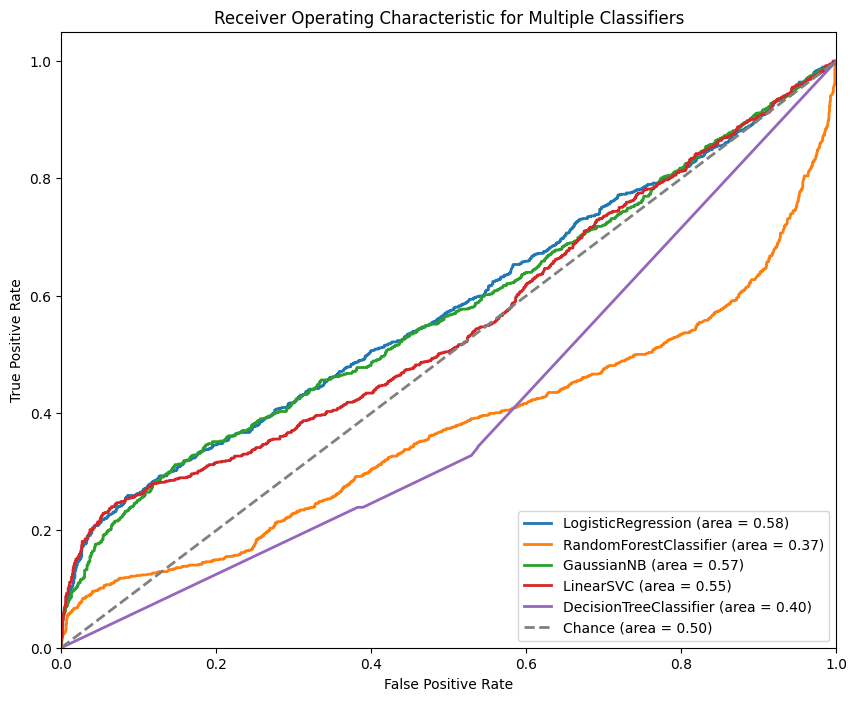

In [379]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC  # Using SVC with probability=True since LinearSVC doesn't support predict_proba
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Sample dataset loading code
# X, y = ...

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Dictionary to hold models
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'RandomForestClassifier': RandomForestClassifier(),
    'GaussianNB': GaussianNB(),
    'LinearSVC': SVC(probability=True),  # Using SVC with probability=True since LinearSVC doesn't support predict_proba
    'DecisionTreeClassifier': DecisionTreeClassifier()
}

# Figure for plotting
plt.figure(figsize=(10, 8))

# Loop through models, train, predict, and plot ROC
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict probabilities. For SVC, decision_function is used; for others, predict_proba
    if name == 'LinearSVC':
        # For binary classification only
        y_scores = model.decision_function(X_test)
    else:
        y_scores = model.predict_proba(X_test)[:, 1]

    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.plot(fpr, tpr, lw=2, label=f'{name} (area = {roc_auc:.2f})')

# Plot baseline for chance performance
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--', label='Chance (area = 0.50)')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multiple Classifiers')
plt.legend(loc="lower right")
plt.show()

In [ ]:
decisiontree=DecisionTreeClassifier()
decisiontree.fit(X_train,y_train)
Y_pred=decisiontree.predict(X_train)
acc_dt=round(decisiontree.score(X_train, y_train) * 100, 2)
print(acc_dt)

84.5


In [ ]:
predictions = decisiontree.predict(X_train)
confusion_matrix(y_train, predictions)

array([[4730,   26],
       [1131, 1578]])

In [ ]:
print(metrics.classification_report(y_train, predictions, digits=3))

              precision    recall  f1-score   support

           0      0.807     0.995     0.891      4756
           1      0.984     0.583     0.732      2709

    accuracy                          0.845      7465
   macro avg      0.895     0.789     0.811      7465
weighted avg      0.871     0.845     0.833      7465



In [ ]:
#decisiontree=DecisionTreeClassifier()
#decisiontree.fit(principalComponents_test,y_test)
Y_pred=decisiontree.predict(X_test)
acc_dt_test=round(decisiontree.score(X_test, y_test) * 100, 2)
print(acc_dt_test)

47.73


In [ ]:
predictions = decisiontree.predict(X_test)
confusion_matrix(y_test, predictions)

array([[986, 609],
       [692, 202]])

In [ ]:
print(metrics.classification_report(y_test, predictions, digits=3))

              precision    recall  f1-score   support

           0      0.588     0.618     0.603      1595
           1      0.249     0.226     0.237       894

    accuracy                          0.477      2489
   macro avg      0.418     0.422     0.420      2489
weighted avg      0.466     0.477     0.471      2489



In [380]:
from sklearn.model_selection import cross_val_score,cross_val_predict
CVS=cross_val_score(decisiontree,X_train,y_train,cv=3)
print(CVS)                                                                      #Cross Validation
CVP=cross_val_predict(decisiontree,X_train,y_train,cv=3)
confusion_matrix(y_train,CVP)

[0.49537967 0.5        0.50924437]


array([[2964, 1792],
       [1933,  776]])

In [383]:
CVS=cross_val_score(gaussian,X_train,y_train,cv=3)
print(CVS)                                                                      #Cross Validation
CVP=cross_val_predict(gaussian,X_train,y_train,cv=3)
confusion_matrix(y_train,CVP)

[0.65729209 0.664791   0.66157556]


array([[4324,  432],
       [2097,  612]])

In [382]:
CVS=cross_val_score(random_forest,X_train,y_train,cv=3)
print(CVS)                                                                      #Cross Validation
CVP=cross_val_predict(random_forest,X_train,y_train,cv=3)
confusion_matrix(y_train,CVP)

[0.54841302 0.5727492  0.58159164]


array([[3671, 1085],
       [2143,  566]])

In [384]:
CVS=cross_val_score(logreg,X_train,y_train,cv=3)
print(CVS)                                                                      #Cross Validation
CVP=cross_val_predict(logreg,X_train,y_train,cv=3)
confusion_matrix(y_train,CVP)

[0.66733628 0.66639871 0.67926045]


array([[4612,  144],
       [2312,  397]])

In [ ]:
svc=LinearSVC()
svc.fit(X_train,y_train)
Y_pred=svc.predict(X_train)
acc_svc=round(svc.score(X_train, y_train) * 100, 2)
print(acc_svc)



66.98


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



In [381]:
CVS=cross_val_score(svc,X_train,y_train,cv=3)
print(CVS)                                                                      #Cross Validation
CVP=cross_val_predict(svc,X_train,y_train,cv=3)
confusion_matrix(y_train,CVP)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[0.66613098 0.66438907 0.67845659]


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



array([[4618,  138],
       [2328,  381]])

In [ ]:
predictions = svc.predict(X_train)
confusion_matrix(y_train, predictions)

array([[4622,  134],
       [2331,  378]])

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_train, predictions, digits=3))

              precision    recall  f1-score   support

           0      0.665     0.972     0.789      4756
           1      0.738     0.140     0.235      2709

    accuracy                          0.670      7465
   macro avg      0.702     0.556     0.512      7465
weighted avg      0.691     0.670     0.588      7465



In [ ]:
#svc=LinearSVC()
#svc.fit(principalComponents_test,y_test)
Y_pred=svc.predict(X_test)
acc_svc_test=round(svc.score(X_test, y_test) * 100, 2)
print(acc_svc_test)


68.3


In [ ]:
predictions = svc.predict(X_test)
confusion_matrix(y_test, predictions)

array([[1553,   42],
       [ 747,  147]])

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, predictions, digits=3))

              precision    recall  f1-score   support

           0      0.675     0.974     0.797      1595
           1      0.778     0.164     0.271       894

    accuracy                          0.683      2489
   macro avg      0.726     0.569     0.534      2489
weighted avg      0.712     0.683     0.609      2489



In [ ]:
y_true=predictions

In [ ]:
results = pd.DataFrame({
    'Model': [ 'Logistic Regression',
              'Random Forest',
              'gaussian',
              'Decision Tree',
              'LinearSVC'
              ],
    'training_Score': [ acc_log, acc_random_forest, acc_gaussian, acc_dt ,acc_svc ]})
result_df = results.sort_values(by='training_Score', ascending=False)
result_df = result_df.set_index('Model')
result_df.head(9)

,training_Score
Model,
Random Forest,84.50
Decision Tree,84.50
Logistic Regression,67.11
LinearSVC,66.98
gaussian,66.32


In [ ]:
results = pd.DataFrame({
    'Model': [ 'Logistic Regression',
              'Random Forest',
              'gaussian',
              'Decision Tree',
              'LinearSVC'
              ],
    'Testing_Score': [ acc_log_test, acc_random_forest_test, acc_gaussian_test, acc_dt_test ,acc_svc_test ]})
result_df = results.sort_values(by='Testing_Score', ascending=False)
result_df = result_df.set_index('Model')
result_df.head(9)

,Testing_Score
Model,
Logistic Regression,68.46
LinearSVC,68.30
gaussian,66.77
Random Forest,53.23
Decision Tree,47.73


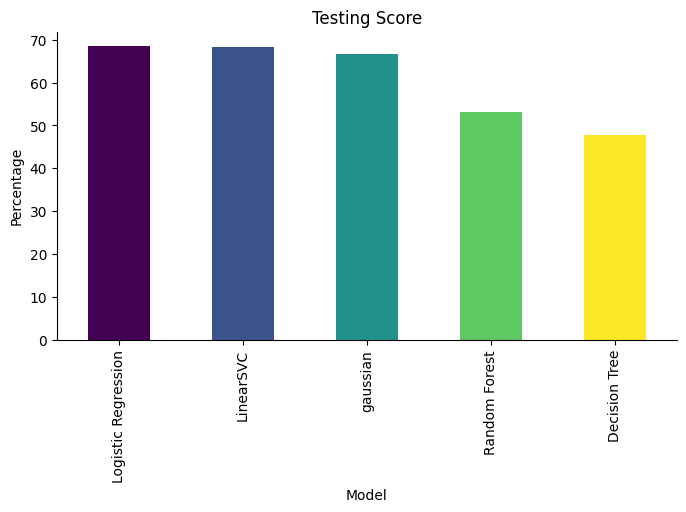

In [ ]:
# @title Testing_Score


colors = plt.cm.viridis(np.linspace(0, 1, len(result_df)))

# Create a bar plot with different colors for each bar
result_df['Testing_Score'].plot(kind='bar', figsize=(8, 4), color=colors, title='Testing Score')

# Customize the plot
plt.gca().spines[['top', 'right']].set_visible(False)

plt.ylabel("Percentage")

# Show the plot
plt.show()

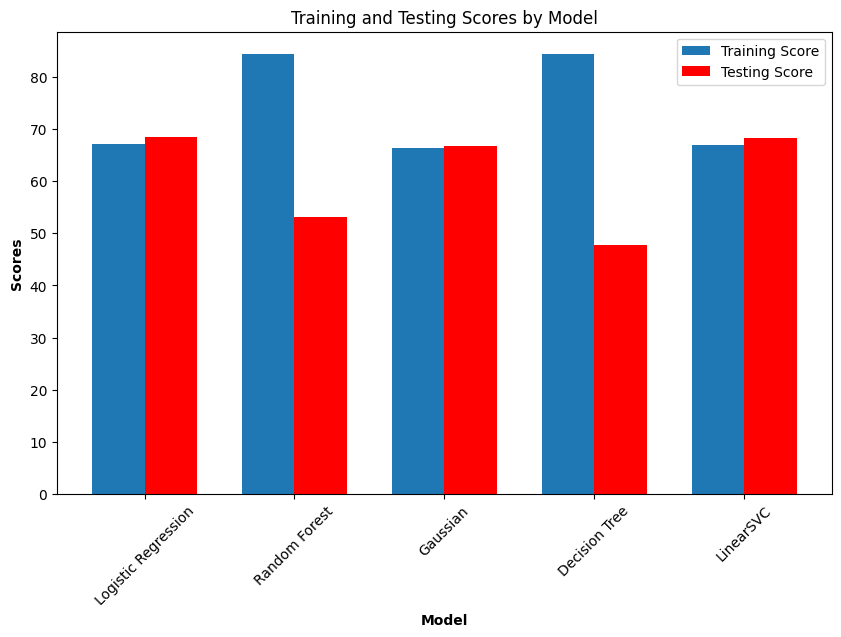

In [ ]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Gaussian', 'Decision Tree', 'LinearSVC'],
    'Training_Score': [67.11, 84.50, 66.32, 84.50, 66.98],
    'Testing_Score': [68.46, 53.23, 66.77, 47.69, 68.30]
})

result_df = results.set_index('Model')

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Define bar width
bar_width = 0.35

# Set position of bar on X axis
r1 = np.arange(len(result_df))
r2 = [x + bar_width for x in r1]

# Make the plot
ax.bar(r1, result_df['Training_Score'], color='#1f77b4', width=bar_width, label='Training Score')
ax.bar(r2, result_df['Testing_Score'], color='red', width=bar_width, label='Testing Score')

# Add xticks on the middle of the group bars
ax.set_xlabel('Model', fontweight='bold')
ax.set_ylabel('Scores', fontweight='bold')
ax.set_title('Training and Testing Scores by Model')
ax.set_xticks([r + bar_width/2 for r in range(len(result_df))])
ax.set_xticklabels(result_df.index, rotation=45)

# Create legend & Show graphic
ax.legend()
plt.show()